# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [124]:
# Dependencies and Setup
# !pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
# from api_keys import api_key
api_key = "200ced843d020015d026320be8db3f17"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [125]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# city_small_list = cities[0:3] 
# print(city_small_list)

615

In [126]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# setup weather list to hold reponse info
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

weather_list = []
# lat
# long
# country
# date
# temp
# humid
# cloud
# earth
# wind
# fire

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [127]:
# # Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("-------------------------")

record_count = 0

for city in cities:
    record_count += 1
    print(f"Retrieving weather data for --{record_count}-- {city}")
    try:
        weather_response = requests.get(query_url + city).json()
        lat = weather_response['coord']['lat']
        long = weather_response['coord']['lon']
        country = weather_response['sys']['country']
        date = weather_response['dt']
        temp = weather_response['main']['temp_max']
        humid = weather_response['main']['humidity']
        cloud = weather_response['clouds']['all']
        wind = weather_response['wind']['speed']
        # create a data frame
        weather_list.append({
            "City": city,
            "Cloudiness": cloud,
            "Country": country,
            "Date": date,
            "Humidity": humid,
            "Lat": lat,
            "Long": long,
            "Max Temp": temp,
            "Wind Speed": wind
        })
        
        # OpenWeatherMap API only allows 60 calls per minute, suspend execution for 0.5 seconds between cities
        time.sleep(0.5)
    except:
        print("No data for that city, skipping....")
        pass
        
print("----------------------------")
print("  Data Retrieval Complete  ")
print("----------------------------")

Beginning Data Retrieval
-------------------------
Retrieving weather data for --1-- palabuhanratu
No data for that city, skipping....
Retrieving weather data for --2-- acapulco
Retrieving weather data for --3-- hermanus
Retrieving weather data for --4-- phangnga
Retrieving weather data for --5-- rikitea
Retrieving weather data for --6-- atuona
Retrieving weather data for --7-- sitka
Retrieving weather data for --8-- tiksi
Retrieving weather data for --9-- punta arenas
Retrieving weather data for --10-- ayan
Retrieving weather data for --11-- lebu
Retrieving weather data for --12-- attawapiskat
No data for that city, skipping....
Retrieving weather data for --13-- poshekhonye
Retrieving weather data for --14-- gorkovskoye
No data for that city, skipping....
Retrieving weather data for --15-- le vauclin
Retrieving weather data for --16-- dikson
Retrieving weather data for --17-- provideniya
Retrieving weather data for --18-- roche-la-moliere
Retrieving weather data for --19-- severo-kur

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [128]:
# Use pandas to build dataframe
weather_data_pd = pd.DataFrame(weather_list)

# Extract fields from the data frame for plotting
lat_plot = weather_data_pd["Lat"]
temp_plot = weather_data_pd["Max Temp"]
humid_plot = weather_data_pd["Humidity"]
cloud_plot = weather_data_pd["Cloudiness"]
wind_plot = weather_data_pd["Wind Speed"]

# Export the City_Data into a csv
weather_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
weather_data_pd.count()

# Show Dataframe
weather_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,acapulco,5,MX,1554691440,88,16.86,-99.88,77.00,5.82
1,hermanus,20,ZA,1554695184,94,-34.42,19.24,60.01,1.01
2,phangnga,20,TH,1554692400,55,8.45,98.53,89.60,2.24
3,rikitea,8,PF,1554695690,100,-23.12,-134.97,77.22,5.73
4,atuona,76,PF,1554695691,99,-9.80,-139.03,82.71,11.32


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

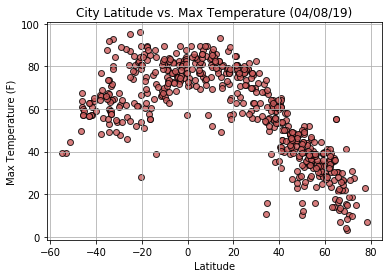

In [129]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lat_plot, 
            temp_plot,
            c="indianred",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Add labels
# Use strftime to convert date
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Figure1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

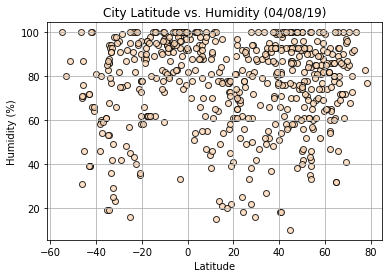

In [130]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lat_plot, 
            humid_plot,
            c="peachpuff",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Add labels
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Figure2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

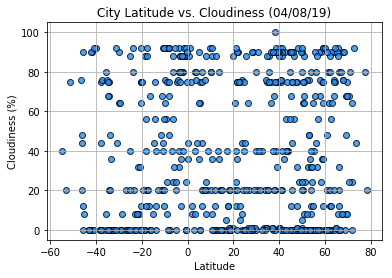

In [131]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat_plot, 
            cloud_plot,
            c="dodgerblue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Add labels
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Figure3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

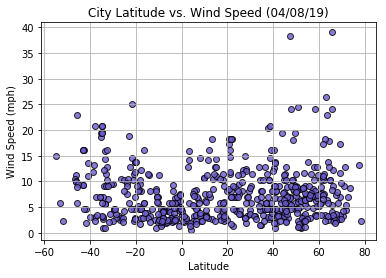

In [132]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat_plot, 
            wind_plot,
            c="slateblue",
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Add labels
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Figure4.png")

# Show plot
plt.show()